## Question 1: Happiness

In [133]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import string
import time
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AgglomerativeClustering

In [134]:
# read data
data2015original = pd.read_csv("https://raw.githubusercontent.com/sauchilee/Stat517/master/Data/World_Happiness_2015.csv")
data2016original = pd.read_csv("https://raw.githubusercontent.com/sauchilee/Stat517/master/Data/World_Happiness_2016.csv")
data2017original = pd.read_csv("https://raw.githubusercontent.com/sauchilee/Stat517/master/Data/World_Happiness_2017.csv")

In [135]:
data2015 = data2015original
data2016 = data2016original
data2017 = data2017original

# preprocess data

#drop country name because it's not a useful feature
#drop happiness features because it's the output
data2015 = data2015.drop(['Country', 'Happiness Rank', 'Happiness Score', 'Standard Error'], axis=1)
data2016 = data2016.drop(['Country', 'Happiness Rank', 'Happiness Score', 'Lower Confidence Interval', 'Upper Confidence Interval'], axis=1)
data2017 = data2017.drop(['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high', 'Whisker.low'], axis=1)
#convert region to categorical indicators using get_dummies
data2015 = pd.get_dummies(data2015, columns=['Region'])
data2016 = pd.get_dummies(data2016, columns=['Region'])

## Preliminary Visualization

(158, 17)


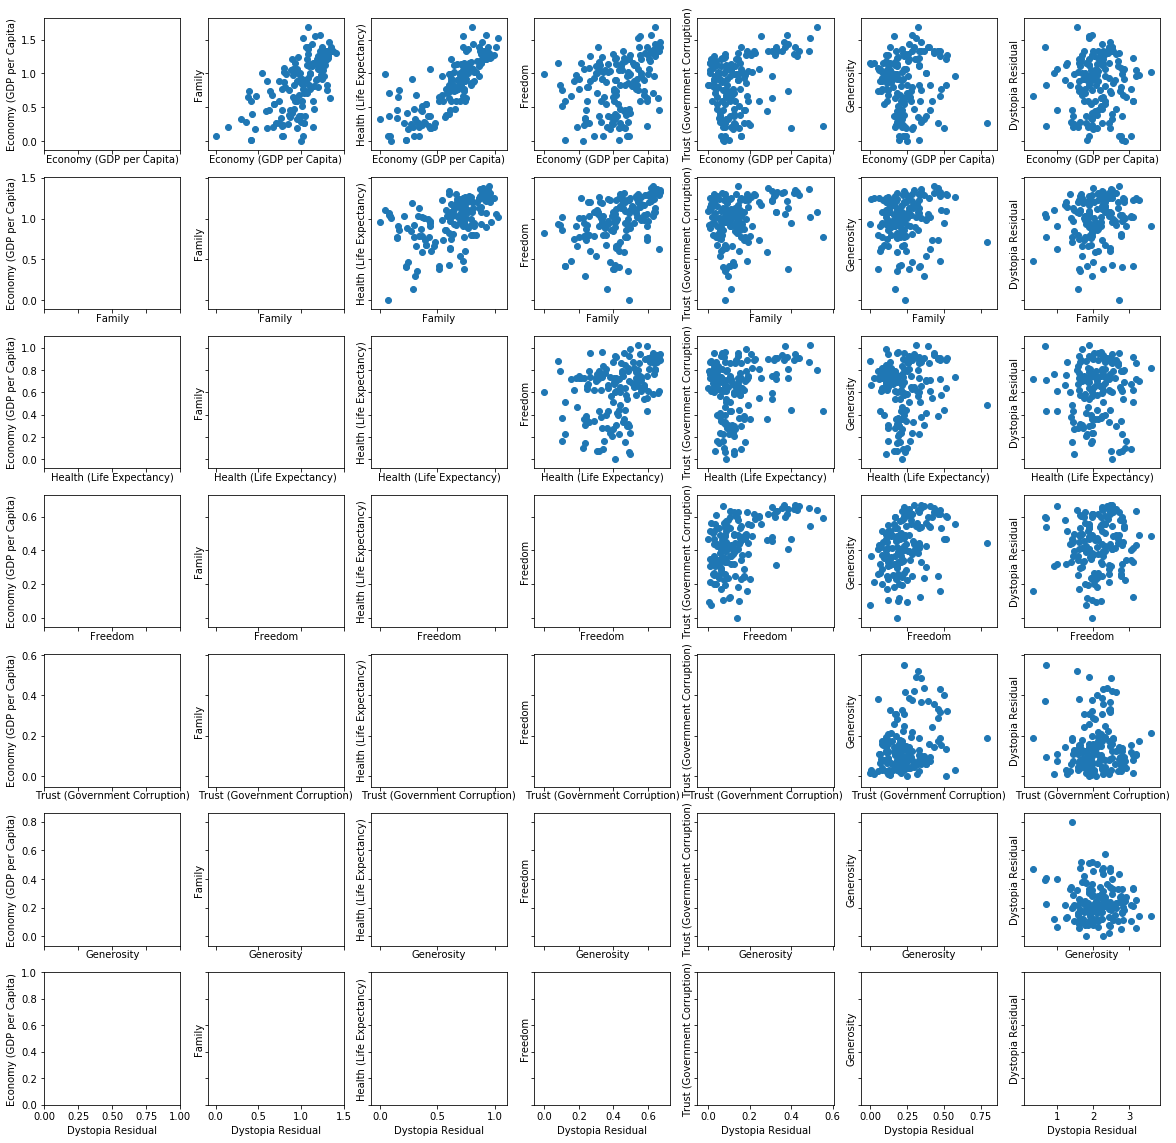

In [136]:
titles = data2015.axes[1]
f, ax = plt.subplots(7, 7, figsize=(20, 20), sharex='col', sharey='row')
for m in range(6):
    for n in range(m+1, 7):
        ax[m,n].scatter(data2015[titles[n]], data2015[titles[m]])
        #ax[m,n].xlabel(titles[n])
        #ax[m,n].ylabel(titles[m])
for i, row in enumerate(ax):
    for j, cell in enumerate(row):
        cell.set_xlabel(titles[i])
        cell.set_ylabel(titles[j])
        
print (data2015.shape)
plt.show()

We can see that there is correlation between economy and family size, and economy and life expectancy. Graphs that are redundant have been omitted.

## PCA Dimension Reduction

In [137]:
pca = PCA(n_components=2)
pca.fit(data2015)
data2015 = pca.transform(data2015)

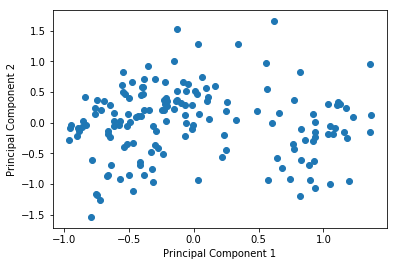

In [138]:
plt.scatter([n[0] for n in data2015],[n[1] for n in data2015])
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

## KMeans

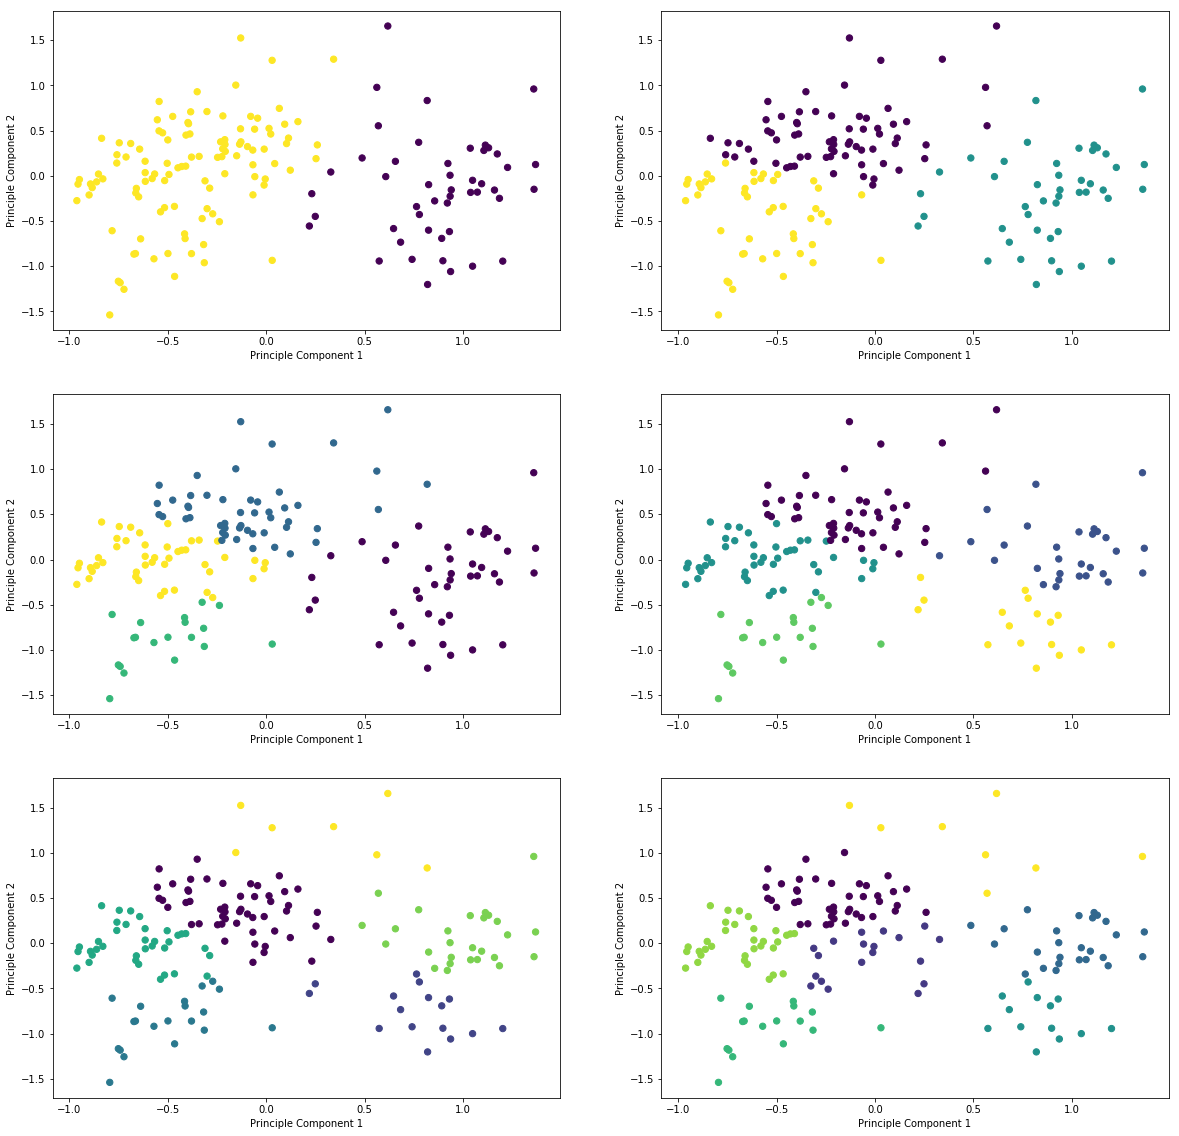

In [139]:
plt.figure(figsize=(20,20))
for numClusters in range(2, 8):
    plt.subplot(3,2,numClusters-1)
    kmeans = KMeans(n_clusters=numClusters, random_state=int(time.time()))
    kmeans.fit(data2015)
    labels = kmeans.predict(data2015)
    plt.xlabel('Principle Component 1')
    plt.ylabel('Principle Component 2')
    plt.scatter(data2015[:, 0], data2015[:, 1], c=labels, marker="o", s=40, cmap='viridis')
plt.show()

## GMM

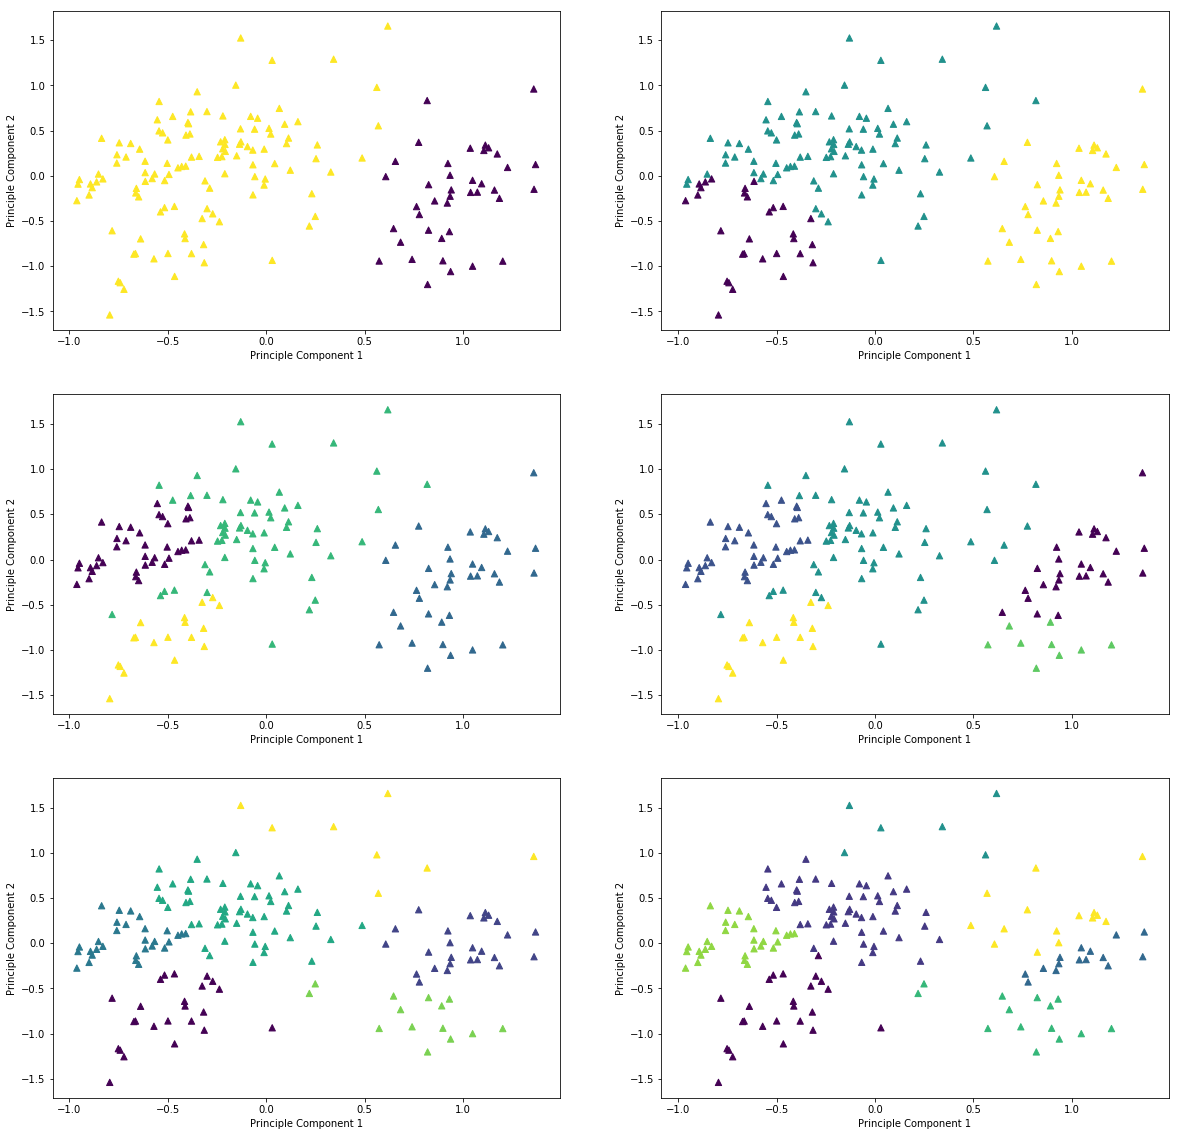

In [140]:
plt.figure(figsize=(20,20))
for numComponents in range(2, 8):
    plt.subplot(3,2,numComponents-1)
    gmm = GaussianMixture(n_components=numComponents, covariance_type='full').fit(data2015)
    gmm.fit(data2015)
    labels = gmm.predict(data2015)
    plt.xlabel('Principle Component 1')
    plt.ylabel('Principle Component 2')
    plt.scatter(data2015[:, 0], data2015[:, 1], c=labels, marker="^", s=40, cmap='viridis')
plt.show()

## AgglomerativeClusutering

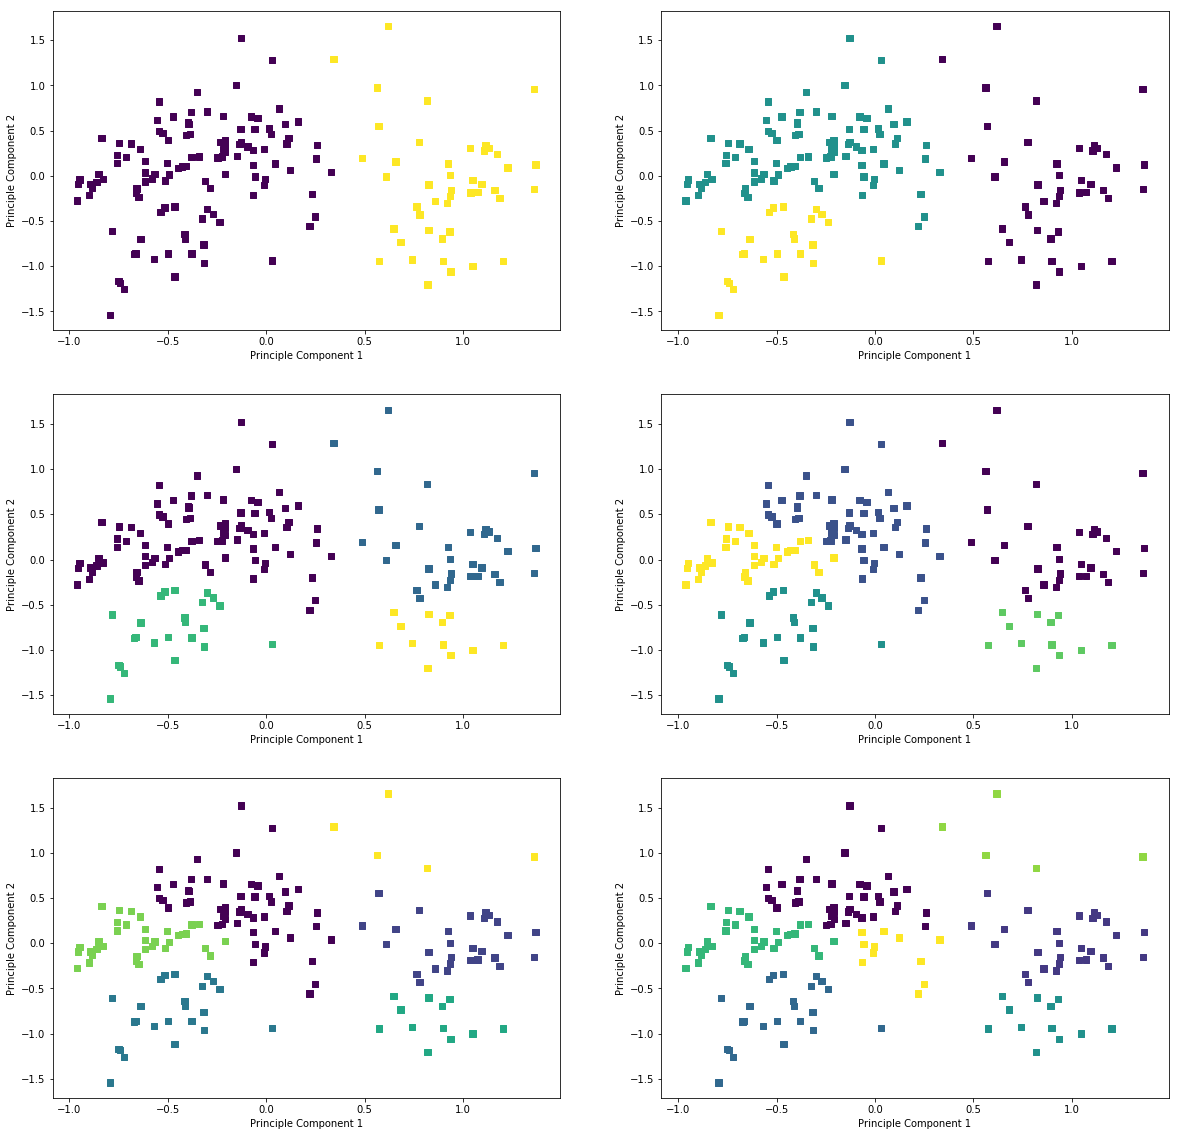

In [141]:
plt.figure(figsize=(20,20))
for numClusters in range(2, 8):
    plt.subplot(3,2,numClusters-1)
    cluster = AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto', connectivity=None, linkage='ward', memory=None, n_clusters=numClusters, pooling_func='deprecated')
    labels = cluster.fit_predict(data2015)
    plt.xlabel('Principle Component 1')
    plt.ylabel('Principle Component 2')
    plt.scatter(data2015[:, 0], data2015[:, 1], c=labels, marker="s", s=40, cmap='viridis')
plt.show()

## Spectral Clustering

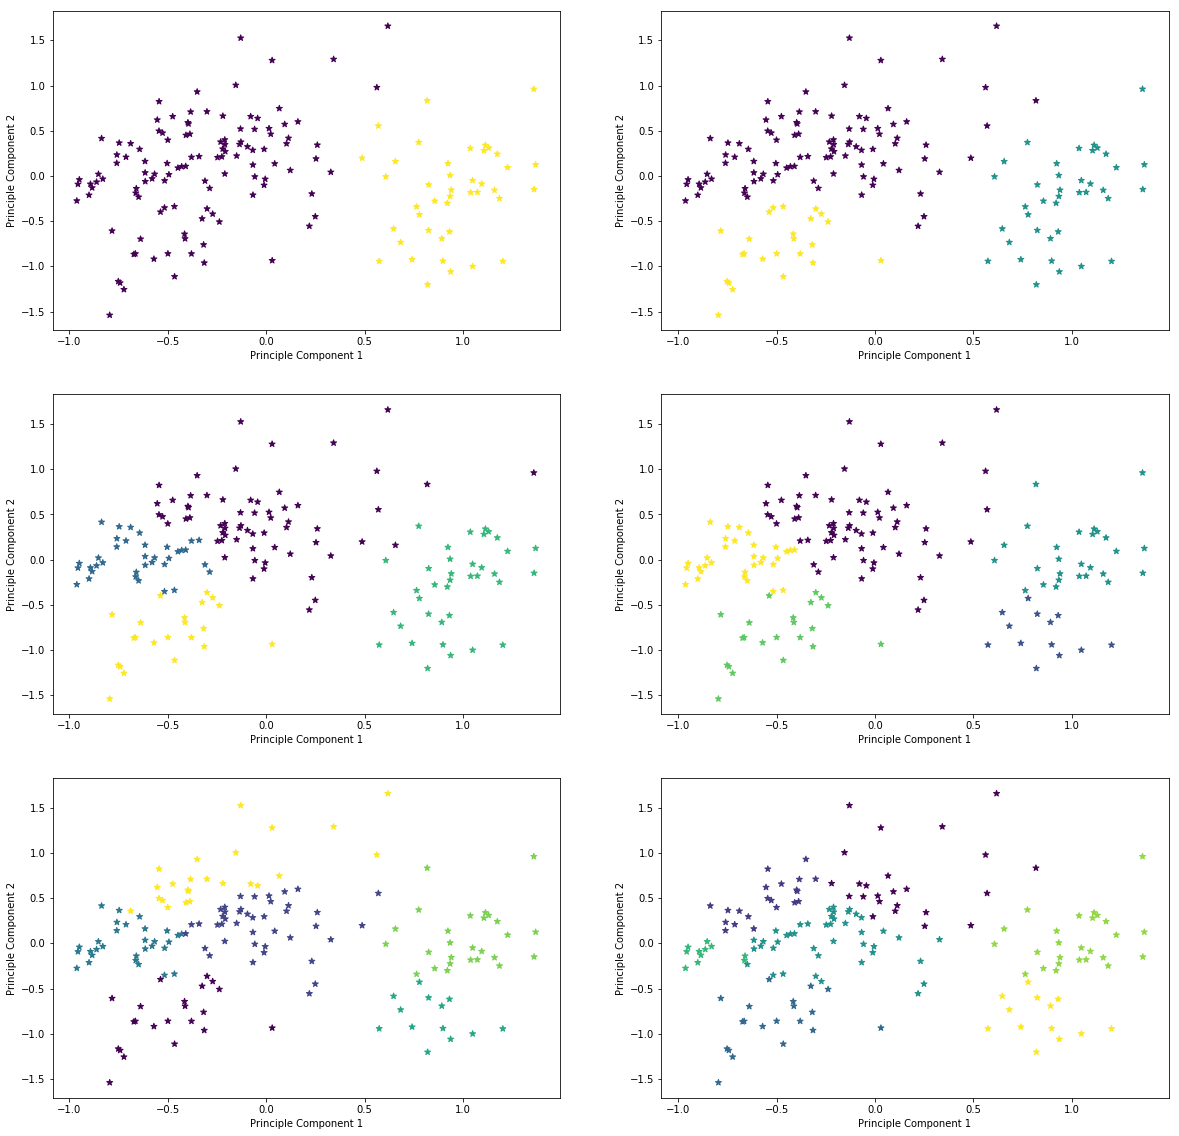

In [145]:
plt.figure(figsize=(20,20))
for numClusters in range(2, 8):
    plt.subplot(3,2,numClusters-1)
    cluster = SpectralClustering(n_clusters=numClusters, affinity='nearest_neighbors', assign_labels='kmeans')
    labels = cluster.fit_predict(data2015)
    plt.xlabel('Principle Component 1')
    plt.ylabel('Principle Component 2')
    plt.scatter(data2015[:, 0], data2015[:, 1], c=labels, marker="*", s=40, cmap='viridis')
plt.show()

In [142]:
# seriation
#agglomerative
#optimal leaf ordering

In [143]:
# discuss questions